In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import plotly.express as px
from sodapy import Socrata
import requests

In [2]:
gdf = gpd.read_file('2010_.csv')

Unique values in 'month_by_cat': [], Categories (3, object): ['Jan-Apr' < 'May-Aug' < 'Sep-Dec']
Counts of each category: month_by_cat
Jan-Apr    0
May-Aug    0
Sep-Dec    0
Name: count, dtype: int64


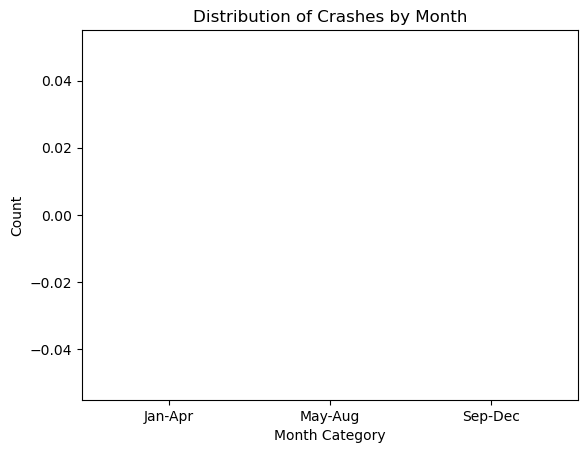

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a GeoDataFrame named 'gdf' with a 'Date Occurred' column

# Convert 'Date Occurred' column to datetime
gdf['Date Occurred'] = pd.to_datetime(gdf['Date Occurred'], format='%m/%d/%Y', errors='coerce')

# Drop rows with NaN values in the 'Date Occurred' column
gdf = gdf.dropna(subset=['Date Occurred'])

# Create a new column 'month_by_cat' to store the categories
gdf['month_by_cat'] = pd.cut(
    gdf['Date Occurred'].dt.month,
    bins=[0, 4, 8, 12],  # Adjust the bin edges as needed
    labels=['Jan-Apr', 'May-Aug', 'Sep-Dec'],
    right=False,
    include_lowest=True
)

# Print some information about the data
print("Unique values in 'month_by_cat':", gdf['month_by_cat'].unique())
print("Counts of each category:", gdf['month_by_cat'].value_counts().sort_index())

# Plotting using matplotlib directly
plt.bar(gdf['month_by_cat'].value_counts().sort_index().index, gdf['month_by_cat'].value_counts().sort_index())
plt.title('Distribution of Crashes by Month')
plt.xlabel('Month Category')
plt.ylabel('Count')
plt.show()

